# Analyse Exploratoire

### Import des modules

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import numpy as np

In [3]:

# Définir le chemin vers le fichier source
input_file = "data/2016_Building_Energy_Benchmarking.csv"
output_file = "data/2016_Building_Energy_Benchmarking_Purge.csv"

# Lire le fichier CSV
df = pd.read_csv(input_file)

# Afficher les noms de colonnes pour repérer celle correspondant à l’usage
print("Colonnes disponibles :", df.columns.tolist())

# Voici les valeurs à garder :
non_residential_keywords = [
    "NonResidential",
    "Nonresidential COS",
    "Nonresidential WA",
    "SPS-District K-12",
    "Campus"
]

# Adapter ici avec le vrai nom de la colonne d’usage
usage_column = "BuildingType"  # remplace si le nom est différent

# Filtrer les lignes contenant les types spécifiés
filtered_df = df[df[usage_column].isin(non_residential_keywords)]

# Sauvegarder le résultat dans un nouveau fichier CSV
filtered_df.to_csv(output_file, index=False)

print(f"Fichier filtré enregistré dans : {output_file}")


Colonnes disponibles : ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
Fichier filtré enregistré dans :

### Aperçu général

In [8]:
# 1. Chargement des données et aperçu général 
building_consumption = pd.read_csv("data/2016_Building_Energy_Benchmarking_Purge.csv")
# Aperçu général
print("Dimensions :", building_consumption.shape)
print("\nColonnes :", building_consumption.columns.tolist())
building_consumption.head(5)


Dimensions : (1668, 46)

Colonnes : ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### Infos sur les types de données -  valeurs nulles & non nulles

In [9]:
# 2. Informations générales sur les colonnes
# Infos sur les types de données et valeurs non nulles
building_consumption.info()

# Statistiques descriptives des colonnes numériques
# building_consumption.describe(include='number').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                            1668 non-null   object 
 8   ZipCode                          1652 non-null   float64
 9   TaxParcelIdentificationNumber    1668 non-null   object 
 10  CouncilDistrictCode              1668 non-null   int64  
 11  Neighborhood                     1668 non-null   object 
 12  Latitude            

### y-a-t-il des valeurs manquantes ?

In [10]:
#  3. Analyse des valeurs manquantes building_consumption
# Nombre et pourcentage de valeurs manquantes par colonne
missing_data = building_consumption.isnull().sum().to_frame('MissingCount')
missing_data['MissingPct'] = 100 * missing_data['MissingCount'] / len(building_consumption)
missing_data = missing_data[missing_data['MissingCount'] > 0].sort_values(by='MissingPct', ascending=False)

missing_data


,MissingCount,MissingPct
Comments,1668,100.000000
Outlier,1651,98.980815
YearsENERGYSTARCertified,1570,94.124700
ThirdLargestPropertyUseType,1315,78.836930
ThirdLargestPropertyUseTypeGFA,1315,78.836930
SecondLargestPropertyUseType,813,48.741007
SecondLargestPropertyUseTypeGFA,813,48.741007
ENERGYSTARScore,574,34.412470
ZipCode,16,0.959233
LargestPropertyUseTypeGFA,6,0.359712


In [17]:
# 4. Analyse des variables catégorielles

# Colonnes de type "object" (catégorielles ou texte)
cat_cols = building_consumption.select_dtypes(include='object').columns.tolist()

# Nombre de modalités uniques par variable catégorielle
building_consumption[cat_cols].nunique().sort_values(ascending=False)


PropertyName                     1664
Address                          1647
TaxParcelIdentificationNumber    1587
ListOfAllPropertyUseTypes         373
YearsENERGYSTARCertified           64
LargestPropertyUseType             56
SecondLargestPropertyUseType       47
ThirdLargestPropertyUseType        39
PrimaryPropertyType                22
Neighborhood                       19
BuildingType                        5
ComplianceStatus                    4
Outlier                             2
State                               1
City                                1
dtype: int64


# 🏢 Analyse Sémantique des Colonnes avec Types

✅ **Structure thématique** (par sections)  
✅ **Descriptions précises et synthétiques**  
✅ **Typologie de données intégrées** de façon concise  
✅ **Première analyse** en termes de **variable de prédiction (VP)** et **variable cible (VC)**  

---

## 🧾 Informations Générales sur les Bâtiments

| Colonne                         | Description                                                      | Type    | Comments          |
| ------------------------------- | ---------------------------------------------------------------- | ------- | ------------------|
| `OSEBuildingID`                 | Identifiant unique attribué par la ville à chaque bâtiment.      | `int`   | ------------------|       
| `DataYear`                      | Année de collecte ou de déclaration des données (ici : 2016).    | `int`   | ----fixe (2016) --|
| `BuildingType`                  | Catégorie générale du bâtiment (ex : NonResidential, Campus...). | `cat`   | -pas très précis X|
| `PrimaryPropertyType`           | Type principal d’usage du bâtiment (ex : Hotel, Office...).      | `cat`   | VP potentielle ---|
| `PropertyName`                  | Nom ou désignation commerciale du bâtiment.                      | `text`  | ----inutile ----X-|
| `Address`                       | Adresse postale complète du bâtiment.                            | `text`  | ---localisation-X-|
| `City`                          | Ville où est situé le bâtiment.                                  | `cat`   | ---localisation-X-|
| `State`                         | Code de l’État (ex : WA pour Washington).                        | `cat`   | ---localisation-X-|
| `ZipCode`                       | Code postal (peut être manquant ou arrondi).                     | `float` | ---localisation-X-|
| `TaxParcelIdentificationNumber` | Identifiant fiscal unique de la parcelle cadastrale.             | `text`  | ---Admin  X ------|

---

## 🗺️ Localisation Administrative 

| Colonne                   | Description                                        | Type   | Comments            |
|---------------------------|----------------------------------------------------|--------|---------------------|
| `CouncilDistrictCode`     | Code du district municipal (conseil de quartier).  | `int`  | ---localisation-X---|
| `Neighborhood`            | Nom du quartier de Seattle.                        | `cat`  | ---localisation-X---|
| `Latitude` / `Longitude`  | Coordonnées géographiques du bâtiment.             | `float`| ---localisation-X---|



---

## 🏗️ Caractéristiques Physiques du Bâtiment

| Colonne                  | Description                                    | Type    | Commments          |
| ------------------------ | ---------------------------------------------- | ------- | ------------------ |
| `YearBuilt`              | Année de construction du bâtiment principal.   | `int`   | VP potentielle ----| 
| `NumberofBuildings`      | Nombre de bâtiments sur le site.               | `float?`| VP potentielle ----| 
| `NumberofFloors`         | Nombre d’étages du bâtiment principal.         | `int`   | VP potentielle ----| 
| `PropertyGFATotal`       | Surface brute totale (GFA = Gross Floor Area). | `int`   | utile temp---------| 
| `PropertyGFAParking`     | Surface utilisée pour le stationnement.        | `int`   | utile temp---------|  
| `PropertyGFABuilding(s)` | Surface brute construite hors parking.         | `int`   | utile temp---------| 

---

## 🧰 Usage et Fonction du Bâtiment plus précisément

| Colonne                           | Description                                          | Type    | Comments          |
|-----------------------------------|------------------------------------------------------|---------|-------------------|
| `ListOfAllPropertyUseTypes`       | Tous les usages déclarés (texte libre ou concaténé). | `text`  | pas très précis X |
| `PrimaryPropertyType`             | type de bâtiment (hôtel, bureau, école…).            | `cat`   | VP potentielle ---| 
| `LargestPropertyUseType`          | Usage majoritaire du bâtiment.                       | `cat`   | --- redondant ----| 
| `LargestPropertyUseTypeGFA`       | Surface dédiée à cet usage principal.                | `float` | trop précis X     |
| `SecondLargestPropertyUseType`    | Deuxième usage principal (si applicable).            | `cat`   | trop précis X     |
| `SecondLargestPropertyUseTypeGFA` | Surface correspondante.                              | `float` | trop précis X     |
| `ThirdLargestPropertyUseType`     | Troisième usage principal.                           | `cat`   | trop précis X     |
| `ThirdLargestPropertyUseTypeGFA`  | Surface correspondante.                              | `float` | trop précis X     |

---

## 🌟 Certifications & Scores Énergétiques


| Colonne                    | Description                                       | Type    | Comments          |
|----------------------------|-------------------------------------------------- |---------|-------------------|
| `YearsENERGYSTARCertified` | Années où le bâtiment a été certifié ENERGY STAR. | `text`  | peu renseignée ---|
| `ENERGYSTARScore`          | Score d’efficacité énergétique de 1 à 100.        | `float` | peu renseignée ---|

---

## 🔋 Indicateurs d’Efficacité Énergétique


| Colonne                | Description                                         | Type    | Comments          |
|------------------------|-----------------------------------------------------|---------|-------------------|
| `SiteEUI(kBtu/sf)`     | EUI (Energy Use Intensity) sur site, en kBtu/pied². | `float` | ----inutile ----X-|
| `SiteEUIWN(kBtu/sf)`   | EUI sur site, corrigé météo.                        | `float` | ----inutile ----X-|
| `SourceEUI(kBtu/sf)`   | EUI à la source (inclut pertes réseau).             | `float` | ----inutile ----X-|
| `SourceEUIWN(kBtu/sf)` | EUI source, corrigé météo.                          | `float` | ----inutile ----X-|

---

## ⚡ Consommation d’Énergie

| Colonne                 | Description                            | Type    | Comms               |
| ----------------------- | -------------------------------------- | ------- | ------------------- |
| `SiteEnergyUse(kBtu)`   | Consommation  totale du site           | `float` | ---V Cible ---------|
| `SiteEnergyUseWN(kBtu)` | Idem, corrigée des effets climatiques. | `float` | --liée à la V Cible-|
| `SteamUse(kBtu)`        | Consommation de vapeur en kBtu.        | `float` | --No use -----------|
| `Electricity(kWh)`      | Consommation d’électricité en kWh.     | `float` | --No use -----------|
| `Electricity(kBtu)`     | Électricité convertie en kBtu.         | `float` | --No use -----------|
| `NaturalGas(therms)`    | Consommation de gaz en therms.         | `float` | --No use -----------|
| `NaturalGas(kBtu)`      | Gaz converti en kBtu.                  | `float` | --No use -----------|

---

## 📋 Métadonnées et Statuts 

| Colonne            | Description                                                    | Type      | Comments          |
|--------------------|----------------------------------------------------------------|-----------|-------------------|
| `DefaultData`      | Indique si des valeurs par défaut ont été utilisées (booléen). | `bool`    | ----No use -------|
| `Comments`         | Champ libre (aucune donnée renseignée ici).                    | `NaN`     | ----No use -------|
| `ComplianceStatus` | Statut de conformité du bâtiment (Compliant, etc.).            | `cat`     | ----No use -------|
| `Outlier`          | Indicateur de données aberrantes ou exclues ??                 |`float/NaN`| ----No use -------|

---

## 🌍 Émissions de Gaz à Effet de Serre (GES)

| Colonne                | Description                                                | Type   | Comments          |
|------------------------|------------------------------------------------------------|--------|-------------------|
| `TotalGHGEmissions`     | Quantité totale de GES émis (probablement en tonnes CO₂e).| `float`| ---V Cible -------|
| `GHGEmissionsIntensity` | Intensité des émissions rapportée à la surface.           | `float`| ----No use -------|

## 📝 Interprétation du champ `ComplianceStatus`

---

### 📘 Analyse du champ `ComplianceStatus`

La colonne `ComplianceStatus` indique si chaque bâtiment a **rempli ou non ses obligations réglementaires** dans le cadre du reporting énergétique annuel.
C’est une variable **qualitative catégorielle**, généralement composée de statuts comme :

* `Compliant` : conforme — le bâtiment a bien soumis ses données dans les délais.
* `Non-Compliant` : non conforme — le bâtiment n’a pas respecté ses obligations.
* `Exempt` : exempté — par exemple, les bâtiments de petite taille ou certains types non soumis à l’obligation.
* `Unknown` ou valeurs manquantes : non renseigné.

---

#### 📊 Ce que montre l’analyse :

* La **majorité des bâtiments sont conformes**, ce qui reflète un bon taux d’adhésion à la politique énergétique.
* La **part de non-conformes ou inconnus** peut signaler :

  * Des **problèmes de suivi administratif**,
  * Une **mauvaise qualité des données**,
  * Ou une **marge d’amélioration** pour les années suivantes.

---

#### 🧠 Utilité analytique :

* Ce champ de **filtre pour ne garder que les bâtiments dont les données sont jugées fiables (Compliant)**.
* Il est aussi évenutellement aussi utile pour les **statistiques de qualité de données** et le reporting réglementaire.





In [11]:


# 🔹 Analyse du champ ComplianceStatus
compliance_counts = df['ComplianceStatus'].value_counts(dropna=False)
compliance_percent = df['ComplianceStatus'].value_counts(normalize=True, dropna=False) * 100

# Affichage des comptes et pourcentages
compliance_summary = pd.DataFrame({
    'Nombre de bâtiments': compliance_counts,
    'Pourcentage (%)': compliance_percent.round(2)
})
display(compliance_summary)

# 🔹 Visualisation
#plt.figure(figsize=(8, 5))
#sns.barplot(x=compliance_counts.index, y=compliance_counts.values, palette='Set2')
#plt.title("Répartition du statut de conformité (ComplianceStatus)")
#plt.xlabel("Statut de conformité")
#plt.ylabel("Nombre de bâtiments")
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


,Nombre de bâtiments,Pourcentage (%)
ComplianceStatus,,
Compliant,3211,95.11
Error - Correct Default Data,113,3.35
Non-Compliant,37,1.10
Missing Data,15,0.44


### 🔍 Visualisation des outliers par définition de surface utile (log-log)

Ce bloc de code vise à comparer visuellement la distribution des bâtiments "normaux" et des "outliers" (hauts ou bas) en **fonction de différentes définitions de surface utile nette**. Les visualisations sont réalisées en échelle logarithmique (`log-log`) pour compenser l’asymétrie extrême des données.

#### 🧼 Étapes préliminaires :
- **Chargement des données nettoyées** depuis un fichier CSV.
- Remplacement des valeurs manquantes dans la colonne `'Outlier'` par `'Normal'` pour garantir une classification complète.

#### 📐 Définition des surfaces comparées :
Trois variantes de surface sont testées :
1. `GFABuilding(s)` : surface utile du bâtiment (hors parkings).
2. `GFATotal` : surface totale incluant parkings et annexes.

#### ⚡ Variable cible :
- `SiteEnergyUse(kBtu)` représente la **consommation énergétique brute**.

#### 🎨 Palette :
Une palette de couleurs est définie pour distinguer :
- **Bâtiments normaux** (`skyblue`)
- **Outliers élevés** (`red`)
- **Outliers faibles** (`orange`)

#### 🔁 Boucle principale :
Pour chaque variante de surface :
1. On **filtre les bâtiments valides** (ni 0 ni valeurs manquantes).
2. On applique un **logarithme base 10** sur la surface et la consommation.
3. On trace un **scatterplot** avec un code couleur selon le statut d’outlier.

#### 📈 Intérêt :
Cette visualisation permet de :
- Mieux comprendre la relation **surface ↔ consommation énergétique**
- Voir si certains types d’outliers apparaissent plus souvent selon la **définition de surface choisie**
- Guider la sélection de la **meilleure métrique de surface** pour les futures modélisations.



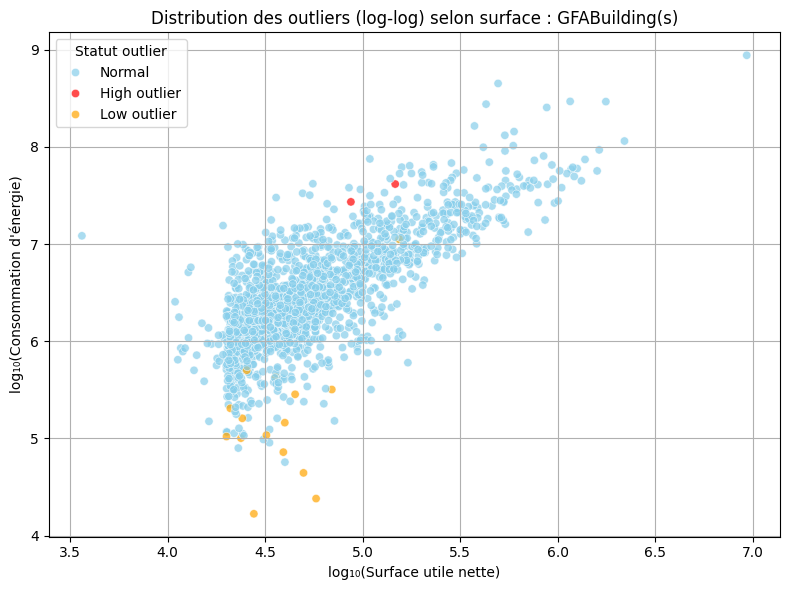

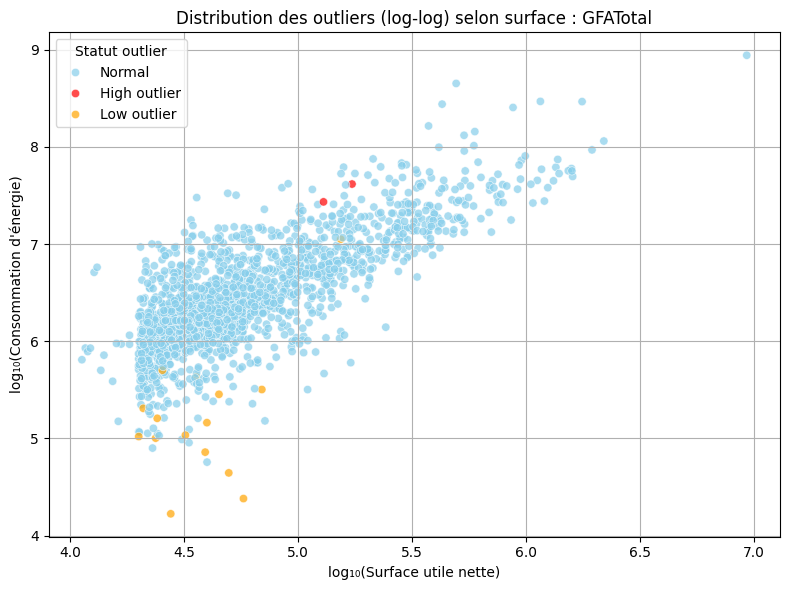

In [15]:


# Chargement du fichier nettoyé
df = pd.read_csv("data/2016_Building_Energy_Benchmarking_Purge.csv")

# Normalisation des valeurs manquantes dans le champ 'outlier'
df['Outlier'] = df['Outlier'].fillna('Normal')

# Définition des variantes de surface utile
surface_variants = {
    'GFABuilding(s)': df['PropertyGFABuilding(s)'],
    'GFATotal': df['PropertyGFATotal']
}

# Energie
energy = df['SiteEnergyUse(kBtu)']

# Palette adaptée aux 3 cas
palette = {
    'Normal': 'skyblue',
    'High outlier': 'red',
    'Low outlier': 'orange'
}

# Boucle sur chaque définition de surface
for label, surface in surface_variants.items():
    # Nettoyage : pas de 0 ou valeurs manquantes
    valid = (surface > 0) & (energy > 0)
    x = np.log10(surface[valid])
    y = np.log10(energy[valid])
    outlier_status = df.loc[valid, 'Outlier']

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, hue=outlier_status, palette=palette, alpha=0.7)
    plt.title(f"Distribution des outliers (log-log) selon surface : {label}")
    plt.xlabel("log₁₀(Surface utile nette)")
    plt.ylabel("log₁₀(Consommation d'énergie)")
    plt.legend(title="Statut outlier")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 📝 **Analyse des variantes de surface utile nette**

Dans les données de benchmarking énergétique, plusieurs colonnes décrivent des surfaces liées au bâtiment.
Elles ne représentent pas toutes la même réalité physique, et **le choix de la bonne surface est déterminant** pour toute analyse de consommation énergétique.

---

## 🔍 **Les trois variantes de surface comparées**

### **1. `PropertyGFABuilding(s)`**

Surface du **bâtiment chauffé / occupé**, c’est la surface **strictement utile**.
➡️ **Généralement la meilleure mesure fonctionnelle.**

---

### **2. `PropertyGFATotal`**

Surface totale **incluant parkings, annexes et zones non chauffées**.
➡️ Peut gonfler artificiellement la surface, ce qui fausse le ratio énergie/surface.
➡️ Risque : un grand parking → grosse surface → bâtiment artificiellement “efficace”.

---

## 🎯 **Les surfaces sont-elles équivalentes ?**

**Non. Elles peuvent différer fortement**, surtout pour les bâtiments avec :

* de grands parkings,
* des annexes importantes,
* des parkings souterrains,
* des structures multi‑bâtiments.

Cette différence peut atteindre **plusieurs ordres de grandeur en log‑scale**, entraînant :

* des variations de pente dans la régression log‑log,
* des changements dans l’identification des outliers,
* une mauvaise estimation de l’« intensité énergétique réelle ».

---

## 📊 **Interprétation des trois graphiques log‑log**

Chaque graphique montre la relation :

* **X = log₁₀(surface utile)**
* **Y = log₁₀(énergie totale consommée)**
* **Couleur = statut outlier (Normal / Low / High)**

### 🔷 `GFABuilding(s)`

* La relation est la **plus propre** :
  ➝ Le nuage suit une ligne quasi linéaire.
* Les outliers représentent réellement des **écarts de performance**, pas des artefacts de surface.
  ➡️ **La variante la plus stable et la plus pertinente pour modéliser la consommation.**

---

### 🔶 `GFATotal`

* Beaucoup de points “décentrés” en raison des parkings.
* Donne l'impression que des bâtiments sont très performants, mais uniquement parce qu’on inclut des surfaces **non chauffées**.
  ➡️ **À éviter pour toute analyse énergétique sérieuse.**

---

### 🟠 `GFATotal – GFAParking`

* Correction partielle du problème, mais pas totale.
* Relation plus propre que `GFATotal`, mais encore bruitée.
  ➡️ **Approche intermédiaire acceptable**, mais reste moins fiable que `GFABuilding(s)`.

---

# ✅ **Conclusion : quelle surface choisir ?**

| Variante                 | Qualité analytique                      | Recommandation             |
| ------------------------ | --------------------------------------- | -------------------------- |
| `PropertyGFABuilding(s)` | ⭐⭐⭐⭐⭐ (meilleure cohérence énergétique) | **À privilégier**          |
| `GFATotal – GFAParking`  | ⭐⭐⭐☆ (acceptable)                       | Utilisable en second choix |
| `GFATotal`               | ⭐☆☆☆☆ (peu fiable)                      | **À éviter**               |

👉 La surface **chauffée/occupée** (`PropertyGFABuilding(s)`) est **la seule cohérente** pour mesurer l’intensité énergétique, comparer les bâtiments ou détecter des outliers.




## 🧹 Nettoyage quasi complet du fichier `2016_Building_Energy_Benchmarking_Purge.csv`

---

### 🎯 Objectif général

Ce script a pour but de **préparer proprement les données de consommation énergétique des bâtiments** de Seattle pour des analyses statistiques ou du machine learning.
Cela implique de **purger le fichier original** de toute information :

* erronée ou manquante,
* non conforme,
* redondante ou inutile.

Le fichier final est exporté sous le nom :
📁 `data/2016_Building_Energy_Benchmarking_ML.csv`

---

## 🛠️ Étapes détaillées

---

### **🔹 Étape 0 : Chargement des données**

* Le fichier brut est importé.
* Un aperçu des dimensions initiales est affiché.

---

### **🔹 Étape 1 : Suppression des lignes avec données critiques manquantes**

Variables considérées comme essentielles :

* `SiteEnergyUse(kBtu)`
* `TotalGHGEmissions`
* `PropertyGFATotal`
* `PropertyGFABuilding(s)`
* `ComplianceStatus`

👉 Si l’une est manquante, la ligne entière est supprimée.
➡️ Cela garantit que **chaque bâtiment retenu dispose d’une information de base complète.**

---

### **🔹 Étape 1bis : Exclusion des bâtiments non conformes**

Deux statuts de conformité sont exclus :

* `Error - Correct Default Data` → Données fausses remplacées automatiquement,
* `Non-Compliant` → Le bâtiment n’a pas fourni ses données.

Ces cas **compromettent la fiabilité des données** :
➡️ Ils sont supprimés pour ne conserver que les bâtiments **conformes, exemptés ou inconnus**.

---

### **🔹 Étape 2 : Suppression des valeurs absurdes**

Toutes les lignes où les valeurs suivantes sont **inférieures ou égales à zéro** sont supprimées :

* Consommation énergétique,
* Émissions de GES,
* Surface totale,
* Surface du bâtiment.

👉 Ces valeurs sont **incompatibles avec une réalité physique cohérente**.

---

### **🔹 Étape 3bis : Suppression des outliers faibles**

Si une colonne `Outlier` existe :

* Les lignes marquées `Low outlier` (anomalies très basses en énergie ou surface) sont supprimées,
* La colonne est ensuite retirée.

➡️ Cette étape permet de **supprimer des valeurs très atypiques** qui pourraient biaiser l’entraînement d’un modèle ou l’interprétation de moyennes.

---

### **🔹 Étape 4 : Suppression des doublons**

* Tous les doublons sont détectés via `df.duplicated()` et supprimés.
* Cela garantit que **chaque ligne du jeu de données représente un bâtiment unique**.

---

### **🔹 Étape 5 : Suppression des colonnes redondantes ou peu utiles**

Plusieurs variables sont supprimées, dont :

* Coordonnées géographiques (`Latitude`, `Longitude`),
* Variables dérivées (`ENERGYSTARScore`, `SiteEUI`, etc.),
* Colonnes très spécifiques ou techniques (`GHGEmissionsIntensity`, etc.),
* Et même `ComplianceStatus` (déjà utilisé au nettoyage).

👉 Ces variables sont jugées :

* soit **inutilisables dans un modèle** (ex. : commentaires, codes),
* soit **très corrélées à d'autres** (ex. : `SiteEUI` avec `SiteEnergyUse(kBtu)` / surface).

---

### **✅ Étape finale : Export du fichier nettoyé**

Le fichier propre est sauvegardé sous :
📄 `data/2016_Building_Energy_Benchmarking_ML.csv`

---

## ✅ Résultat attendu

* 📉 Réduction du bruit et des erreurs dans les données,
* 📈 Meilleure cohérence des variables numériques,
* 🧠 Préparation optimale pour la modélisation, la visualisation ou la détection d’anomalies,
* 💡 Un jeu de données **fiable, stable et utilisable** pour de l’analyse exploratoire ou prédictive.

---

### 🧘‍♂️ Conclusion

**Un bon modèle naît d’un bon nettoyage** : le choix d’écarter les valeurs incomplètes, les anomalies logiques ou les redondances est fondamental pour préserver **la clarté des structures latentes** dans les données.


In [47]:
import pandas as pd

# Étape 0 : Chargement des données
df = pd.read_csv("data/2016_Building_Energy_Benchmarking_Purge.csv")
print("🔹 Données initiales chargées. Dimensions :", df.shape)

# Étape 1 : Suppression des lignes avec valeurs manquantes critiques
critical_cols = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'ComplianceStatus']
print(f"\n🔍 Étape 1 : Suppression des lignes avec valeurs manquantes dans {critical_cols}")
print("Nombre de lignes concernées :", df[critical_cols].isnull().any(axis=1).sum())

decision = input("Supprimer les lignes incomplètes sur les colonnes critiques ? (o/n) : ")
if decision.lower() == 'o':
    df = df.dropna(subset=critical_cols)
    print("✅ Lignes incomplètes supprimées. Nouvelles dimensions :", df.shape)
else:
    print("❗ Étape ignorée.")

# Étape 1bis : Suppression des bâtiments non conformes ou en erreur
non_conform_values = ['Error - Correct Default Data', 'Non-Compliant']
print(f"\n🔍 Étape 1bis : Suppression des bâtiments dont le ComplianceStatus est : {non_conform_values}")
print("Nombre de lignes concernées :", df[df['ComplianceStatus'].isin(non_conform_values)].shape[0])

decision = input("Supprimer ces lignes ? (o/n) : ")
if decision.lower() == 'o':
    df = df[~df['ComplianceStatus'].isin(non_conform_values)]
    print("✅ Lignes supprimées. Nouvelles dimensions :", df.shape)
else:
    print("❗ Étape ignorée.")

# Étape 2 : Suppression des lignes avec valeurs absurdes
mask_invalid = (
    (df['SiteEnergyUse(kBtu)'] <= 0) |
    (df['TotalGHGEmissions'] <= 0) |
    (df['PropertyGFATotal'] <= 0) |
    (df['PropertyGFABuilding(s)'] <= 0)
)

print(f"\n🔍 Étape 2 : {mask_invalid.sum()} lignes avec valeurs absurdes seront supprimées.")

decision = input("Supprimer les lignes avec valeurs absurdes ? (o/n) : ")
if decision.lower() == 'o':
    df = df[~mask_invalid]
    print("✅ Lignes invalides supprimées. Nouvelles dimensions :", df.shape)
else:
    print("❗ Étape ignorée.")

# Étape 3bis : Suppression des "Low Outlier"
if 'Outlier' in df.columns:
    print(f"\n🔍 Étape 3bis : {df[df['Outlier'] == 'Low outlier'].shape[0]} lignes marquées 'Low Outlier' seront supprimées.")
    decision = input("Supprimer les 'Low outlier(s)' ? (o/n) : ")
    if decision.lower() == 'o':
        df = df[df['Outlier'] != 'Low outlier']
        print("✅ 'Low Outlier' supprimés. Nouvelles dimensions :", df.shape)
    else:
        print("❗ Étape ignorée.")
    df = df.drop(columns='Outlier', errors='ignore')
    print("✅ Colonne 'Outlier' supprimée.")
else:
    print("ℹ️ Colonne 'Outlier' non trouvée, étape ignorée.")

# Étape 4 : Suppression des doublons
print(f"\n🔍 Étape 4 : Nombre de doublons détectés :", df.duplicated().sum())
decision = input("Supprimer les doublons ? (o/n) : ")
if decision.lower() == 'o':
    df = df.drop_duplicates()
    print("✅ Doublons supprimés. Nouvelles dimensions :", df.shape)
else:
    print("❗ Étape ignorée.")

# Étape 5 : Suppression des colonnes peu utiles ou redondantes
colonnes_a_supprimer = ['ListOfAllPropertyUseTypes',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
    'YearsENERGYSTARCertified', 'ENERGYSTARScore',
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
    'NaturalGas(therms)', 'NaturalGas(kBtu)',
    'Comments', 'GHGEmissionsIntensity'
]

print("\n🔍 Étape 5 : Suppression des colonnes jugées non pertinentes ou trop spécifiques.")
print(f"{len(colonnes_a_supprimer)} colonnes proposées pour suppression :")
print(colonnes_a_supprimer)

decision = input("Supprimer ces colonnes ? (o/n) : ")
if decision.lower() == 'o':
    df = df.drop(columns=[col for col in colonnes_a_supprimer if col in df.columns])
    print("✅ Colonnes supprimées. Nouvelles dimensions :", df.shape)
else:
    print("❗ Étape ignorée.")

# Étape finale : Sauvegarde du fichier nettoyé
output_file = "data/2016_Building_Energy_Benchmarking_ML.csv"
df.to_csv(output_file, index=False)
print(f"\n💾 Fichier final sauvegardé sous : {output_file}")


🔹 Données initiales chargées. Dimensions : (1668, 46)

🔍 Étape 1 : Suppression des lignes avec valeurs manquantes dans ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'ComplianceStatus']
Nombre de lignes concernées : 2


Supprimer les lignes incomplètes sur les colonnes critiques ? (o/n) :  o


✅ Lignes incomplètes supprimées. Nouvelles dimensions : (1666, 46)

🔍 Étape 1bis : Suppression des bâtiments dont le ComplianceStatus est : ['Error - Correct Default Data', 'Non-Compliant']
Nombre de lignes concernées : 104


Supprimer ces lignes ? (o/n) :  o


✅ Lignes supprimées. Nouvelles dimensions : (1562, 46)

🔍 Étape 2 : 16 lignes avec valeurs absurdes seront supprimées.


Supprimer les lignes avec valeurs absurdes ? (o/n) :  o


✅ Lignes invalides supprimées. Nouvelles dimensions : (1546, 46)

🔍 Étape 3bis : 0 lignes marquées 'Low Outlier' seront supprimées.


Supprimer les 'Low outlier(s)' ? (o/n) :  p


❗ Étape ignorée.
✅ Colonne 'Outlier' supprimée.

🔍 Étape 4 : Nombre de doublons détectés : 0


Supprimer les doublons ? (o/n) :  o


✅ Doublons supprimés. Nouvelles dimensions : (1546, 45)

🔍 Étape 5 : Suppression des colonnes jugées non pertinentes ou trop spécifiques.
18 colonnes proposées pour suppression :
['ListOfAllPropertyUseTypes', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'Comments', 'GHGEmissionsIntensity']


Supprimer ces colonnes ? (o/n) :  o


✅ Colonnes supprimées. Nouvelles dimensions : (1546, 27)

💾 Fichier final sauvegardé sous : data/2016_Building_Energy_Benchmarking_ML.csv


## 🔍 Outliers : deuxième plongée

### 📘 Détection des outliers par Z-score — Consommation énergétique anormale

Ce bloc de code a pour but d’identifier les **bâtiments ayant une consommation d’énergie anormalement élevée ou faible** par rapport à leur taille (surface utile nette). On cherche à **détecter des outliers** (valeurs aberrantes) dans la relation entre :

* `SiteEnergyUse(kBtu)` : consommation énergétique brute,
* `PropertyGFABuilding(s)` : surface du bâtiment.

---

#### 🧪 Étapes de la méthode :

1. **Transformation logarithmique**
   On applique un `log₁₀(x + 1)` à la surface et à la consommation :

   * Cela **réduit l’effet des valeurs extrêmes** et **linéarise la relation**, souvent non-linéaire entre taille et consommation.
   * Permet de mieux visualiser et modéliser la relation en **échelle relative**.

2. **Calcul du Z-score**
   On calcule un **Z-score** sur la variable `Log_Energy` :

   * Le Z-score mesure **l’écart standardisé** d’une valeur par rapport à la moyenne.
   * Une valeur de Z-score = 0 correspond à la moyenne.
   * Une valeur de Z-score > 3 (ou < -3) indique un **écart de plus de 3 écarts-types**, considéré comme **hautement improbable** dans une distribution normale.

3. **Visualisation des points anormaux**

   * Les points normaux sont tracés en bleu (ou couleur par défaut).
   * Les outliers (Z-score > 3 ou < -3) sont en **rouge**, ce qui permet de **repérer visuellement les consommations anormalement élevées (ou basses)** pour la surface du bâtiment.

---

### 📏 La méthode du Z-score : avantages et limites

| ✅ Avantages                                            | ⚠️ Limites                                           |
| ------------------------------------------------------ | ---------------------------------------------------- |
| Simple à calculer                                      | Suppose une distribution **normale (gaussienne)**    |
| Rapide, basé sur des statistiques de base              | Sensible aux outliers eux-mêmes (effet de levier)    |
| Donne une interprétation **standardisée** (écart-type) | Moins robuste en cas de **distribution asymétrique** |

---

### 🔍 Comparaison avec d'autres méthodes d’identification des outliers

| Méthode                        | Principe                                                                 | Robuste aux extrêmes ? | Paramétrable ?                     |
| ------------------------------ | ------------------------------------------------------------------------ | ---------------------- | ---------------------------------- |
| **Z-score**                    | Écart-type par rapport à la moyenne                                      | ❌ Non                  | ⚠️ Seulement par seuil             |
| **IQR (Interquartile Range)**  | Utilise les quartiles Q1/Q3 et l’intervalle interquartile (Q3 - Q1)      | ✅ Oui                  | ✅ Seuil facile à ajuster           |
| **Isolation Forest**           | Arbre aléatoire qui "isole" les valeurs rares                            | ✅ Oui                  | ✅ Modèle basé sur machine learning |
| **DBSCAN**                     | Regroupe les points denses, identifie les valeurs isolées comme outliers | ✅ Oui                  | ✅ Sensible aux paramètres          |
| **LOF (Local Outlier Factor)** | Compare la densité locale de chaque point                                | ✅ Oui                  | ✅ Requiert plus de calculs         |

---

### 🧠 Quand utiliser le Z-score ?

* Très utile quand on **a une distribution à peu près normale**.
* Parfait en **analyse exploratoire rapide** pour repérer des anomalies.
* Moins pertinent si les données sont **fortement asymétriques**, **multi-modales**, ou s’il y a **beaucoup de bruit**.


✅ Données chargées : (1546, 27)


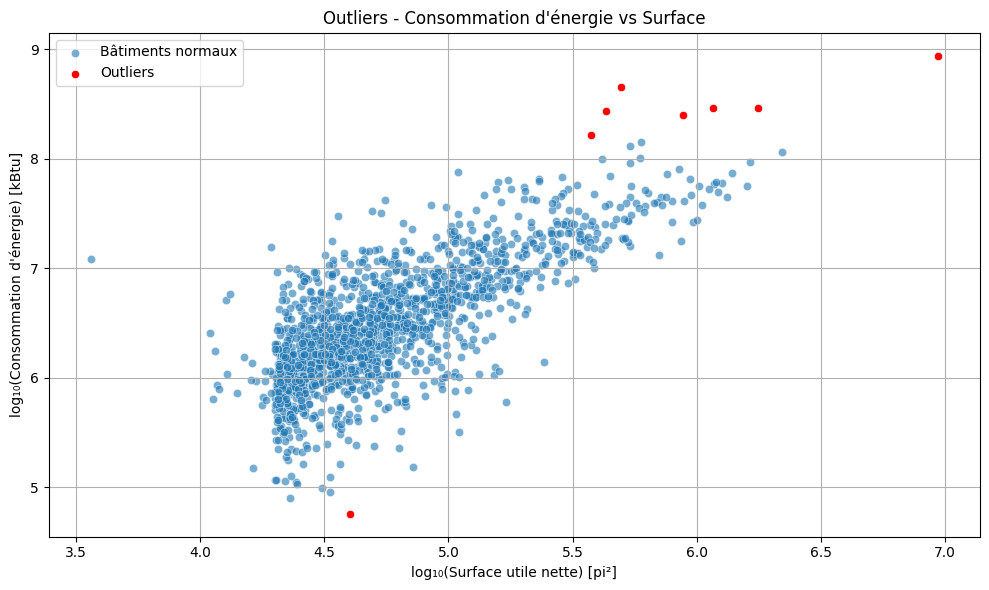

In [48]:

from scipy.stats import zscore

# 🔹 Étape 1 : Charger les données nettoyées
df = pd.read_csv("data/2016_Building_Energy_Benchmarking_ML.csv")
print("✅ Données chargées :", df.shape)

# 🔹 Étape 2 : Calcul des log-transformations
df['Log_Surface'] = np.log10(df['PropertyGFABuilding(s)'] + 1)
df['Log_Energy'] = np.log10(df['SiteEnergyUse(kBtu)'] + 1)

# 🔹 Étape 3 : Calcul du Z-score sur la consommation log-transformée
df['Z_Energy'] = zscore(df['Log_Energy'])

# 🔹 Étape 4 : Détection des outliers selon le seuil |Z| > 3
outliers_energy = df[np.abs(df['Z_Energy']) > 3]

# 🔹 Étape 5 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log_Surface', y='Log_Energy', alpha=0.6, label="Bâtiments normaux")
sns.scatterplot(data=outliers_energy, x='Log_Surface', y='Log_Energy', color='red', label="Outliers")
plt.xlabel("log₁₀(Surface utile nette) [pi²]")
plt.ylabel("log₁₀(Consommation d'énergie) [kBtu]")
plt.title("Outliers - Consommation d'énergie vs Surface")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




### 📘 Visualisation de la distribution de la consommation d’énergie (`SiteEnergyUse(kBtu)`)

Ce script a pour but d’**analyser la forme de la distribution** de la consommation énergétique brute d’un ensemble de bâtiments, afin de déterminer si cette variable suit une **loi normale** (distribution gaussienne). Cela est important si l’on souhaite appliquer des méthodes statistiques qui reposent sur cette hypothèse (comme le Z-score, les tests paramétriques, etc.).

---

#### 🧪 Étapes du script

##### 1. **Préparation des données**

On commence par :

* Copier le DataFrame `building_consumption`.
* Sélectionner la colonne `SiteEnergyUse(kBtu)`.
* Éliminer les valeurs manquantes (`NaN`) et les zéros (non exploitables pour un log).

```python
df = building_consumption.copy()
df = df[['SiteEnergyUse(kBtu)']].dropna()
df = df[df['SiteEnergyUse(kBtu)'] > 0]
```

##### 2. **Transformation logarithmique**

On applique une **transformation `log₁₀`** à la consommation d’énergie pour :

* Réduire les écarts extrêmes (échelle exponentielle des grandes surfaces).
* Approcher une distribution plus symétrique.
* Rendre les visualisations plus lisibles.

```python
df['Log_Energy'] = np.log10(df['SiteEnergyUse(kBtu)'])
```

---

#### 📊 Visualisations multiples

Le script génère **4 graphiques complémentaires** pour analyser la distribution :

---

##### 🟦 1. Histogramme + courbe KDE (noyau de densité)

```python
sns.histplot(df['Log_Energy'], kde=True, bins=30)
```

* **Histogramme** : montre comment les valeurs sont réparties.
* **KDE (Kernel Density Estimate)** : courbe lissée de la densité.
* Permet de repérer visuellement **la symétrie, la dispersion**, et la forme générale.

---

##### 🟩 2. Boîte à moustaches (`boxplot`)

```python
sns.boxplot(x=df['Log_Energy'])
```

* Permet d’identifier les **valeurs extrêmes (outliers)**.
* Affiche la médiane, les quartiles, les extrêmes.
* Très utile pour **voir si la distribution est centrée ou décalée**.

---

##### 🟪 3. Q-Q plot (Quantile-Quantile Plot)

```python
stats.probplot(df['Log_Energy'], dist="norm", plot=plt)
```

* Compare les **quantiles** de la distribution observée avec ceux d’une **loi normale parfaite**.
* Si les points suivent **une ligne droite**, la variable suit une loi normale.
* Les **écarts en début et fin de ligne** signalent des asymétries ou des outliers.

---

##### 🟨 4. Densité réelle vs densité normale théorique

```python
sns.kdeplot(...) + stats.norm.pdf(...)
```

* Trace la **courbe de densité réelle** observée (log-transformée).
* Superpose la **courbe de densité d’une loi normale** ayant la même moyenne et écart-type.
* Permet de voir à quel point la forme réelle **colle ou s’écarte de la théorie**.

---

### 🧠 Que cherche-t-on à conclure ?

Cette série de graphiques permet de :

* Vérifier visuellement si la variable suit une **loi normale (ou proche)**.
* Déterminer si la transformation logarithmique a **stabilisé la distribution**.
* Identifier la présence de **valeurs extrêmes** ou d’une **asymétrie structurelle** (skew).

---

### 🔍 Et ensuite ?

Si la distribution **log-transformée est proche d’une normale**, on pourra :

* Appliquer un **Z-score** de manière fiable.
* Utiliser des modèles **paramétriques** (régression linéaire, ANOVA…).
* Réaliser des **tests statistiques** sur les moyennes ou variances.

Sinon, on pourra préférer des méthodes **robustes ou non paramétriques** (IQR, quantiles, modèles de machine learning, etc.).




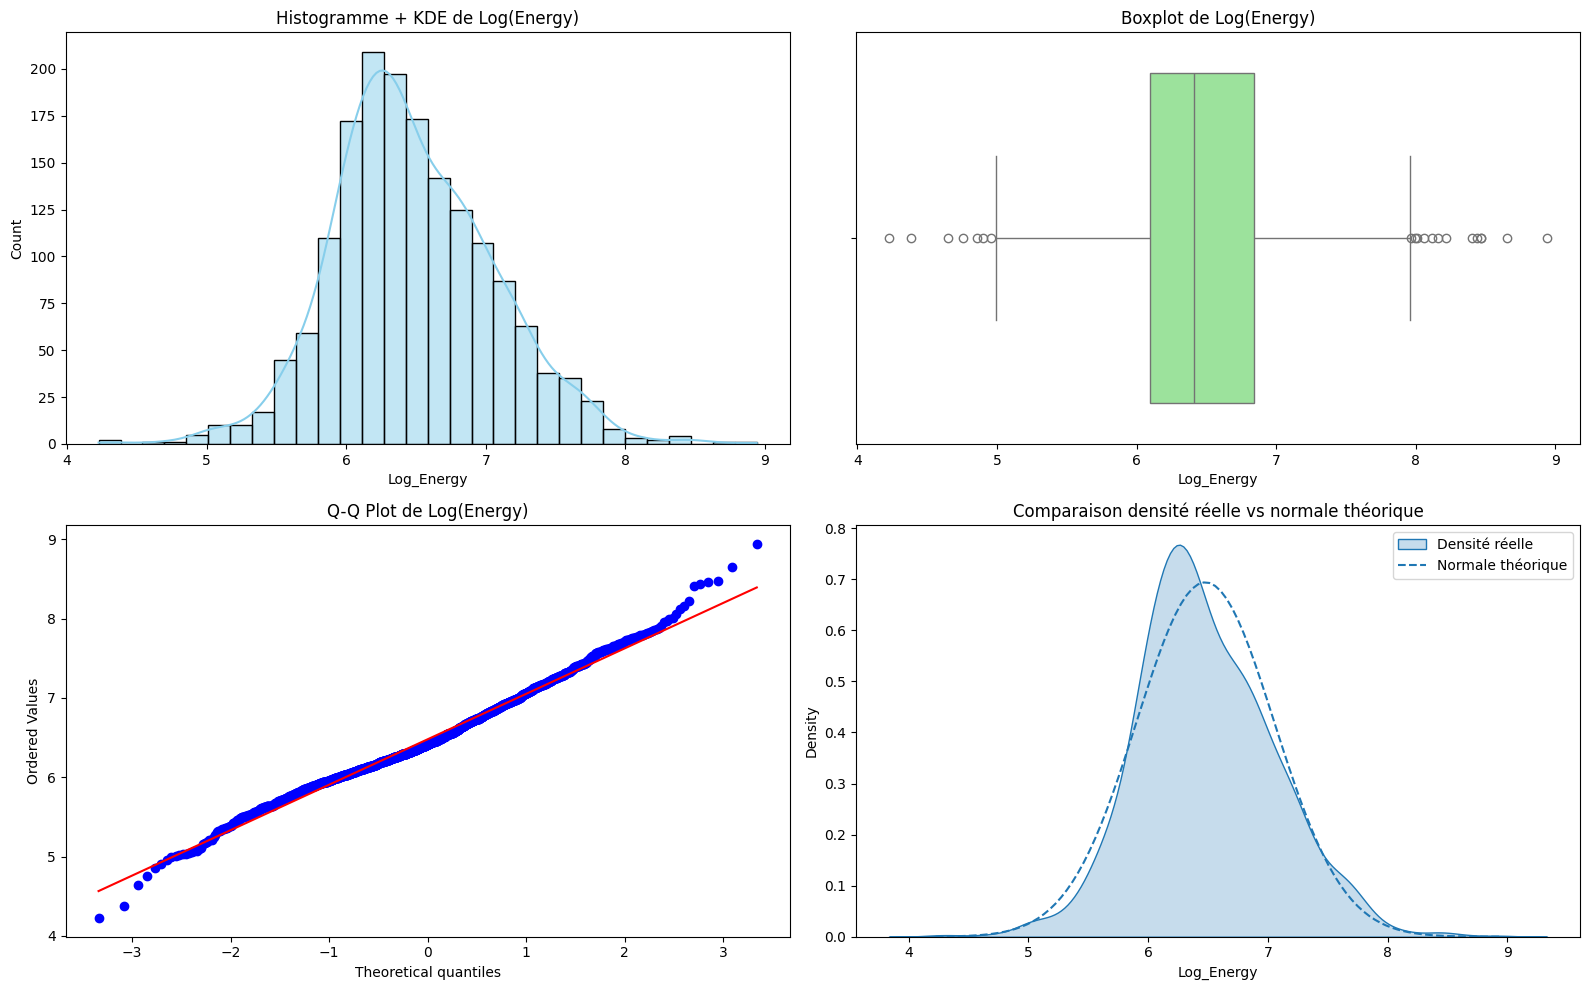

In [84]:

import scipy.stats as stats
import numpy as np

# Copie du DataFrame pour manipulation
df = building_consumption.copy()

# On garde la variable d'intérêt et on filtre les valeurs manquantes ou nulles
df = df[['SiteEnergyUse(kBtu)']].dropna()
df = df[df['SiteEnergyUse(kBtu)'] > 0]

# Transformation logarithmique pour atténuer les valeurs extrêmes
df['Log_Energy'] = np.log10(df['SiteEnergyUse(kBtu)'])

# Créer une figure avec plusieurs visualisations
plt.figure(figsize=(16, 10))

# 1. Histogramme + courbe KDE
plt.subplot(2, 2, 1)
sns.histplot(df['Log_Energy'], kde=True, bins=30, color='skyblue')
plt.title("Histogramme + KDE de Log(Energy)")

# 2. Boîte à moustaches (boxplot)
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Log_Energy'], color='lightgreen')
plt.title("Boxplot de Log(Energy)")

# 3. Q-Q plot (quantile-quantile plot) pour tester la normalité
plt.subplot(2, 2, 3)
stats.probplot(df['Log_Energy'], dist="norm", plot=plt)
plt.title("Q-Q Plot de Log(Energy)")

# 4. Densité empirique comparée à la courbe normale
plt.subplot(2, 2, 4)
sns.kdeplot(df['Log_Energy'], label='Densité réelle', fill=True)
mean = df['Log_Energy'].mean()
std = df['Log_Energy'].std()
x = np.linspace(df['Log_Energy'].min(), df['Log_Energy'].max(), 100)
plt.plot(x, stats.norm.pdf(x, mean, std), label='Normale théorique', linestyle='--')
plt.title("Comparaison densité réelle vs normale théorique")
plt.legend()

plt.tight_layout()
plt.show()




### 📘 Détection visuelle des outliers — comparaison de 5 méthodes

Ce script applique **5 méthodes différentes** pour identifier les **valeurs aberrantes (outliers)** dans la relation entre la **consommation énergétique brute** (`SiteEnergyUse(kBtu)`) et la **surface utile nette** (`PropertyGFABuilding(s)`).
L’objectif est de **comparer les résultats visuellement** et de choisir la méthode **la plus adaptée au contexte**.

---

### 🔍 Méthodes utilisées :

| Méthode                  | Principe                                                                | Avantages                               | Limites                                        |
| ------------------------ | ----------------------------------------------------------------------- | --------------------------------------- | ---------------------------------------------- |
| **Z-score**              | Écart-type par rapport à la moyenne (distribution normale)              | Simple, rapide                          | Sensible aux extrêmes, suppose une normalité   |
| **IQR**                  | Basé sur les quartiles (Q1, Q3) et l'intervalle interquartile           | Robuste, intuitif                       | Moins sensible aux outliers isolés             |
| **Isolation Forest**     | Sépare les points "rares" via des arbres aléatoires                     | Détecte des outliers multidimensionnels | Sensible aux paramètres, plus complexe         |
| **Local Outlier Factor** | Compare la densité locale de chaque point à ses voisins                 | Bon pour les anomalies locales          | Plus lourd à calculer, dépend de k voisins     |
| **DBSCAN**               | Regroupe les points denses et isole les points dispersés comme outliers | Détecte des clusters et anomalies       | Sensible aux paramètres `eps` et `min_samples` |

---

### 📊 Visualisation

Chaque méthode est visualisée par un **nuage de points** :

* Axe X : `log₁₀(Surface)`
* Axe Y : `log₁₀(Consommation d'énergie)`
* Points **rouges** = détectés comme **outliers**
* Points **bleus** = considérés comme **normaux**

Cela permet de :

* Voir **quelles méthodes détectent les mêmes outliers** ou non.
* Identifier les **méthodes trop strictes ou trop laxistes**.
* Choisir une méthode adaptée à la forme des données (linéaire ? dispersée ? clusters ?).

---

### 🧠 Que faire ?

* **Choisir la méthode la plus pertinente visuellement.**
* Filtrer les outliers détectés pour les exclure des analyses globales ou les étudier séparément.
* Possiblement combiner plusieurs méthodes (vote majoritaire, score moyen, etc.).


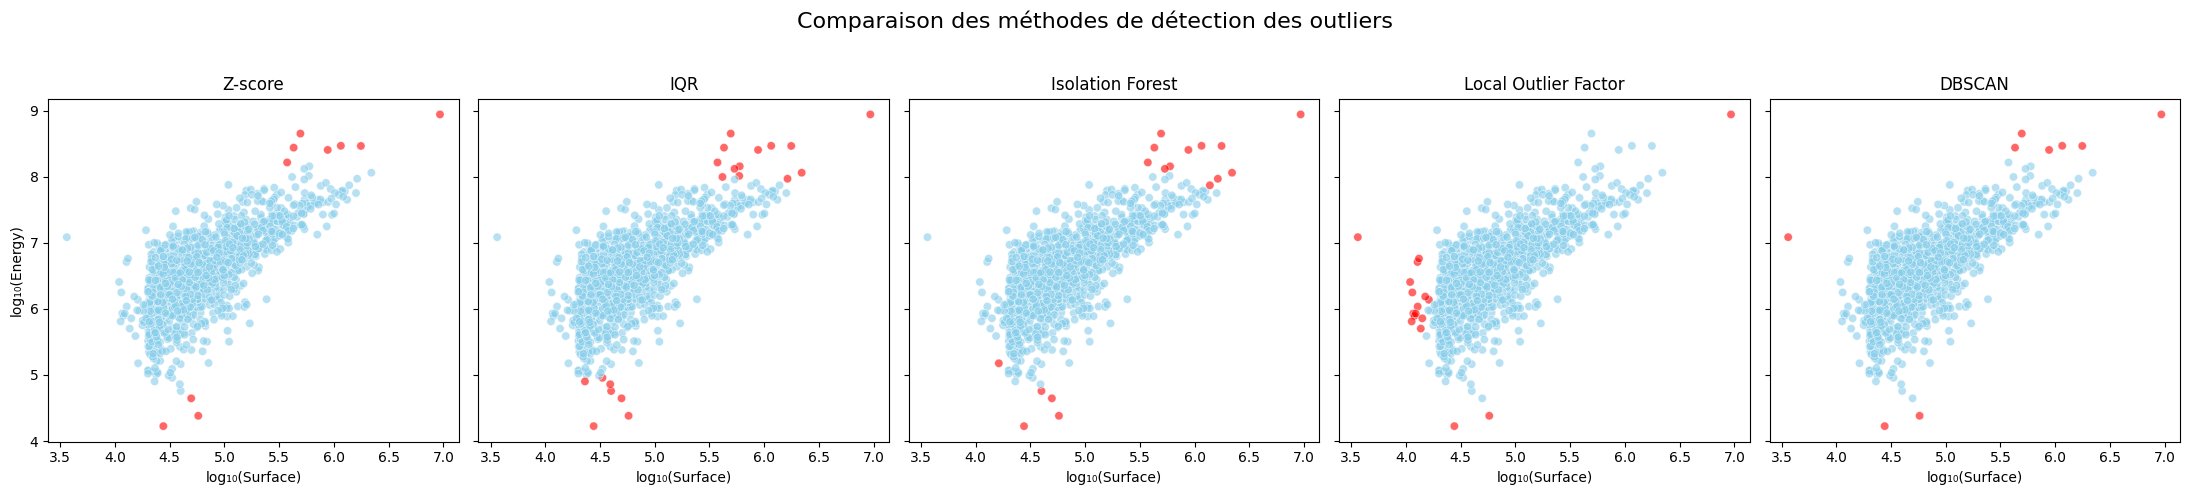

In [85]:

from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Préparation des données
df = building_consumption.copy()
df = df[['PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)']].dropna()
df = df[(df['PropertyGFABuilding(s)'] > 0) & (df['SiteEnergyUse(kBtu)'] > 0)]

# Transformation logarithmique
df['Log_Surface'] = np.log10(df['PropertyGFABuilding(s)'])
df['Log_Energy'] = np.log10(df['SiteEnergyUse(kBtu)'])

### MÉTHODE 1 : Z-score ###
df['Z_Energy'] = zscore(df['Log_Energy'])
df['Outlier_Z'] = np.abs(df['Z_Energy']) > 3

### MÉTHODE 2 : IQR ###
Q1 = df['Log_Energy'].quantile(0.25)
Q3 = df['Log_Energy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Outlier_IQR'] = (df['Log_Energy'] < lower_bound) | (df['Log_Energy'] > upper_bound)

### MÉTHODE 3 : Isolation Forest ###
iso = IsolationForest(contamination=0.01, random_state=42)
df['Outlier_IForest'] = iso.fit_predict(df[['Log_Surface', 'Log_Energy']])
df['Outlier_IForest'] = df['Outlier_IForest'] == -1

### MÉTHODE 4 : Local Outlier Factor ###
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['Outlier_LOF'] = lof.fit_predict(df[['Log_Surface', 'Log_Energy']])
df['Outlier_LOF'] = df['Outlier_LOF'] == -1

### MÉTHODE 5 : DBSCAN ###
# Standardisation
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Log_Surface', 'Log_Energy']])
db = DBSCAN(eps=0.6, min_samples=10)
labels = db.fit_predict(scaled)
df['Outlier_DBSCAN'] = labels == -1

# Affichage comparatif
methods = ['Outlier_Z', 'Outlier_IQR', 'Outlier_IForest', 'Outlier_LOF', 'Outlier_DBSCAN']
titles = ['Z-score', 'IQR', 'Isolation Forest', 'Local Outlier Factor', 'DBSCAN']

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharey=True)

for ax, method, title in zip(axes, methods, titles):
    sns.scatterplot(data=df, x='Log_Surface', y='Log_Energy', 
                    hue=method, palette={False: 'skyblue', True: 'red'},
                    ax=ax, legend=False, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel("log₁₀(Surface)")
    ax.set_ylabel("log₁₀(Energy)")

plt.suptitle("Comparaison des méthodes de détection des outliers", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## 📊 Analyse des Outliers Extrêmes sur la Consommation Énergétique des Bâtiments

### 🎯 Objectif

Détecter les **bâtiments à consommation énergétique anormalement élevée** en se basant sur la méthode **IQR (Interquartile Range)** appliquée à trois variables essentielles :

* `PropertyGFABuilding(s)` : Surface utile nette du bâtiment
* `SiteEnergyUse(kBtu)` : Consommation totale brute d’énergie
* `Energy_per_sf` : Intensité énergétique (kBtu/pi²)

---

## 🧰 Méthodologie

### 1. **Calcul de l’intensité énergétique**

```python
df['Energy_per_sf'] = df['SiteEnergyUse(kBtu)'] / (df['PropertyGFABuilding(s)'] + 1)
```

On ajoute 1 au dénominateur pour éviter la division par zéro.

---

### 2. **Détection des outliers extrêmes**

On utilise la méthode **IQR supérieur uniquement** :

* Calcul du 3e quartile (Q3)
* Calcul de l’IQR : `IQR = Q3 - Q1`
* Seuil : `Seuil_supérieur = Q3 + facteur × IQR`
* Les points supérieurs à ce seuil sont considérés comme **outliers extrêmes**.

```python
upper_factor = 3.0  # Valeur ajustable
```

---

### 3. **Visualisation via boxplots**

Pour chaque variable, on produit un **boxplot** où les **outliers extrêmes sont marqués en rouge**, avec échelle logarithmique pour une lecture plus juste des grands écarts.

Variables affichées :

* Surface utile (`PropertyGFABuilding(s)`)
* Consommation brute (`SiteEnergyUse(kBtu)`)
* Intensité énergétique (`Energy_per_sf`)

---

### 4. **Export des cas extrêmes**

Les 10 bâtiments ayant les **valeurs d’intensité énergétique les plus élevées** sont affichés et l’ensemble est exporté :

📁 Fichier généré : `data/top_extreme_intensity_outliers.csv`

---

## ❓ Pourquoi y a-t-il autant d’outliers extrêmes ?

Plusieurs hypothèses peuvent expliquer cela :

### 🔸 1. **Variabilité structurelle du parc immobilier**

* Les bâtiments étudiés varient fortement en **taille**, **usage**, **année de construction**, **localisation**.
* Une petite surface peut présenter une intensité énergétique énorme si un usage industriel ou technique y est concentré (ex : data centers, laboratoires).

### 🔸 2. **Erreurs ou approximations de mesure**

* Valeurs de consommation ou de surface mal renseignées ou arrondies.
* Des erreurs dans les unités ou des données par défaut conservées.

### 🔸 3. **Typologies mixtes mal normalisées**

* Certains bâtiments peuvent combiner différents usages (résidentiel, commercial, équipements techniques) avec une seule ligne de consommation.
* D'autres peuvent avoir un très faible usage effectif mais une surface élevée déclarée, ou inversement.

### 🔸 4. **Absence de nettoyage métier**

* Sans tenir compte des **types de bâtiment**, de leur **usage réel**, ou de leur **taux d’occupation**, la comparaison brute génère mécaniquement beaucoup d'outliers.

---

## 🧠 Conclusion

Le nombre important d’outliers détectés reflète une **diversité structurelle, technique et parfois administrative** des bâtiments étudiés.
La méthode IQR reste robuste, mais un filtrage plus fin par **type de bâtiment**, **usage énergétique**, ou **surface corrigée** pourrait renforcer la pertinence de l’analyse.




C:\Users\karap\AppData\Local\Temp\ipykernel_31996\1646256059.py:55: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\karap\OpenClassRooms\dataprojet6\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


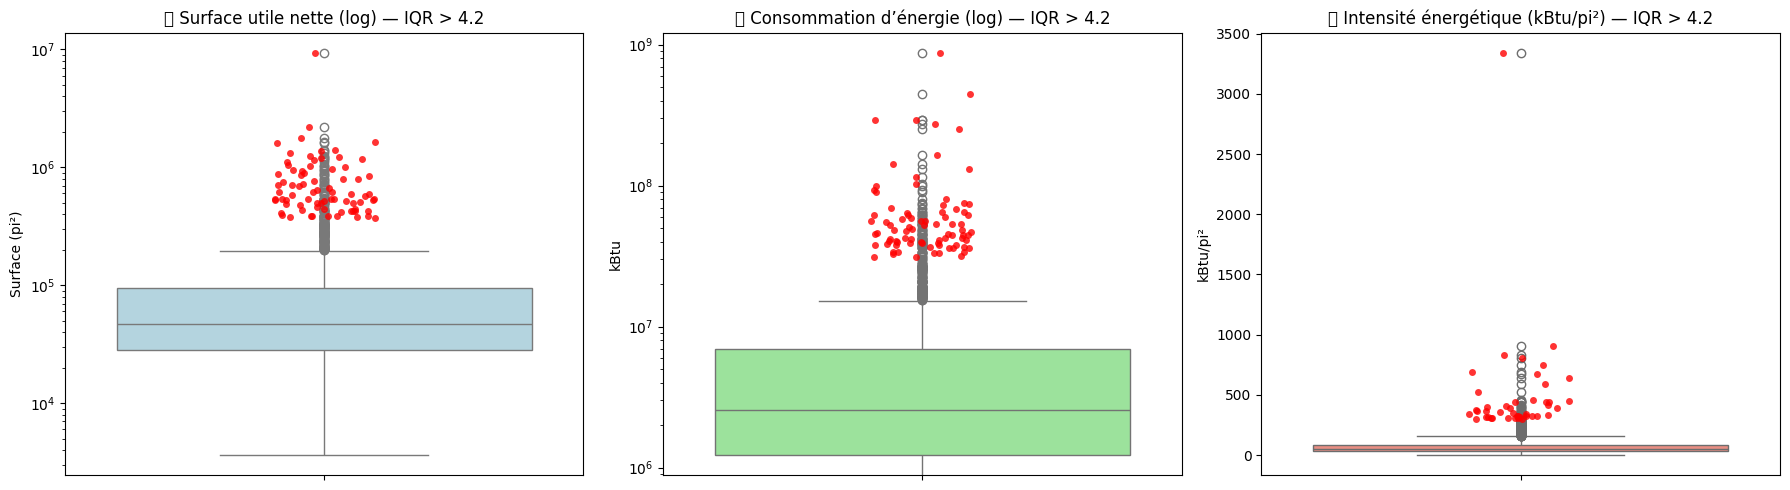


🔎 Top 10 des outliers extrêmes (intensité énergétique) :
      PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  Energy_per_sf
796                     3636           12148720.0    3340.313445
34                    494835          448385312.0     906.129126
234                    36000           30038490.0     834.379323
1331                   19237           15480681.0     804.692847
1603                   55559           41680640.0     750.191505
303                   108912           75073888.0     689.301442
691                    49249           33268410.0     675.500711
548                   429405          274682208.0     639.679483
1591                   53575           31803568.0     593.615947
898                    33971           17686444.0     520.618274

📈 Nombre total d’outliers extrêmes (intensité énergétique) : 43

💾 Fichier sauvegardé : data/top_extreme_intensity_outliers.csv


In [86]:

# Chargement des données
df = pd.read_csv("data/2016_Building_Energy_Benchmarking_Purge.csv")

# Calcul de l’intensité énergétique
df['Energy_per_sf'] = df['SiteEnergyUse(kBtu)'] / (df['PropertyGFABuilding(s)'] + 1)

# 🔧 Facteur ajustable pour outliers extrêmes
upper_factor = 4.2  # à modifier selon le niveau de tolérance

# Fonction de détection IQR supérieur uniquement
def detect_extreme_high(series, factor):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + factor * IQR
    return series > upper

# Création des masques d'outliers extrêmes
df['Outlier_High_Surface'] = detect_extreme_high(df['PropertyGFABuilding(s)'], upper_factor)
df['Outlier_High_Energy'] = detect_extreme_high(df['SiteEnergyUse(kBtu)'], upper_factor)
df['Outlier_High_Intensity'] = detect_extreme_high(df['Energy_per_sf'], upper_factor)

# 🔲 AFFICHAGE DES BOXPLOTS AVEC POINTS ROUGES
plt.figure(figsize=(18, 5))

# 1. Surface utile nette
plt.subplot(1, 3, 1)
sns.boxplot(y=df['PropertyGFABuilding(s)'], color='lightblue')
sns.stripplot(data=df[df['Outlier_High_Surface']], y='PropertyGFABuilding(s)',
              color='red', alpha=0.8, jitter=True)
plt.yscale('log')
plt.title(f"📦 Surface utile nette (log) — IQR > {upper_factor}")
plt.ylabel("Surface (pi²)")
plt.xlabel("")

# 2. Consommation brute
plt.subplot(1, 3, 2)
sns.boxplot(y=df['SiteEnergyUse(kBtu)'], color='lightgreen')
sns.stripplot(data=df[df['Outlier_High_Energy']], y='SiteEnergyUse(kBtu)',
              color='red', alpha=0.8, jitter=True)
plt.yscale('log')
plt.title(f"📦 Consommation d’énergie (log) — IQR > {upper_factor}")
plt.ylabel("kBtu")
plt.xlabel("")

# 3. Intensité énergétique
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Energy_per_sf'], color='salmon')
sns.stripplot(data=df[df['Outlier_High_Intensity']], y='Energy_per_sf',
              color='red', alpha=0.8, jitter=True)
plt.title(f"📦 Intensité énergétique (kBtu/pi²) — IQR > {upper_factor}")
plt.ylabel("kBtu/pi²")
plt.xlabel("")

plt.tight_layout()
plt.show()

# 🔟 EXTRAIT : top 10 des outliers extrêmes (intensité énergétique)
top_extreme_outliers = df[df['Outlier_High_Intensity']].sort_values(by='Energy_per_sf', ascending=False)
top_10_outliers = top_extreme_outliers[['PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'Energy_per_sf']].head(10)

print("\n🔎 Top 10 des outliers extrêmes (intensité énergétique) :")
print(top_10_outliers)

# 📊 Nombre total d'outliers extrêmes en intensité
total_extreme_outliers = top_extreme_outliers.shape[0]
print(f"\n📈 Nombre total d’outliers extrêmes (intensité énergétique) : {total_extreme_outliers}")

# 💾 Sauvegarde dans un fichier CSV
top_extreme_outliers.to_csv("data/top_extreme_intensity_outliers.csv", index=False)
print("\n💾 Fichier sauvegardé : data/top_extreme_intensity_outliers.csv")


# 🧼 Nettoyage Avancé : Outliers Extrêmes & Corrélations entre Variables

Ce notebook réalise un nettoyage complet et contrôlé du dataset
**Building Energy Benchmarking**, incluant :

---

## 1. Suppression des outliers extrêmes

À partir du fichier `top_extreme_intensity_outliers.csv`, les bâtiments présentant une
**intensité énergétique anormalement élevée** (outliers extrêmes) sont retirés
du dataset principal.

Cela permet d’éviter que quelques valeurs exceptionnellement aberrantes
perturbent les analyses et les modèles prédictifs.

---

## 2. Encodage des variables catégorielles

Afin de calculer une matrice de corrélation fiable, toutes les colonnes
catégorielles sont encodées avec `LabelEncoder`.  
Chaque catégorie devient un entier unique.

---

## 3. Matrice de corrélation sur *toutes* les variables numériques

Aucune colonne n’est sélectionnée manuellement.  
Toutes les variables numériques issues du dataset (y compris les encodages)
sont intégrées.

Une **heatmap** permet de visualiser la structure globale des dépendances.

---

## 4. Détection des paires corrélées ≥ 0.85

Après calcul, toutes les paires de variables possédant une corrélation
absolue **supérieure ou égale à 0.85** sont listées.

Une corrélation très élevée peut indiquer :

- Redondance totale (ex : surface totale vs surface bâtiment)
- Variables dérivées l’une de l’autre
- Mesures du même phénomène avec échelle différente

---

## 5. Suppression interactive des variables redondantes

Pour chaque paire fortement corrélée, le script propose :

- Supprimer la **première** variable
- Supprimer la **deuxième** variable
- Ne supprimer **aucune** des deux

L’utilisateur conserve ainsi un contrôle total sur la décision.

---

## 6. Sauvegarde du dataset nettoyé

Après toutes les suppressions choisies, les données finales sont écrites dans : cleaned_2016_Building_Energy_Benchmarking_ML.csv



ℹ️ Sauvegarde déjà existante : data/backup_2016_Building_Energy_Benchmarking_ML.csv
✔️ Outliers supprimés : 43 lignes


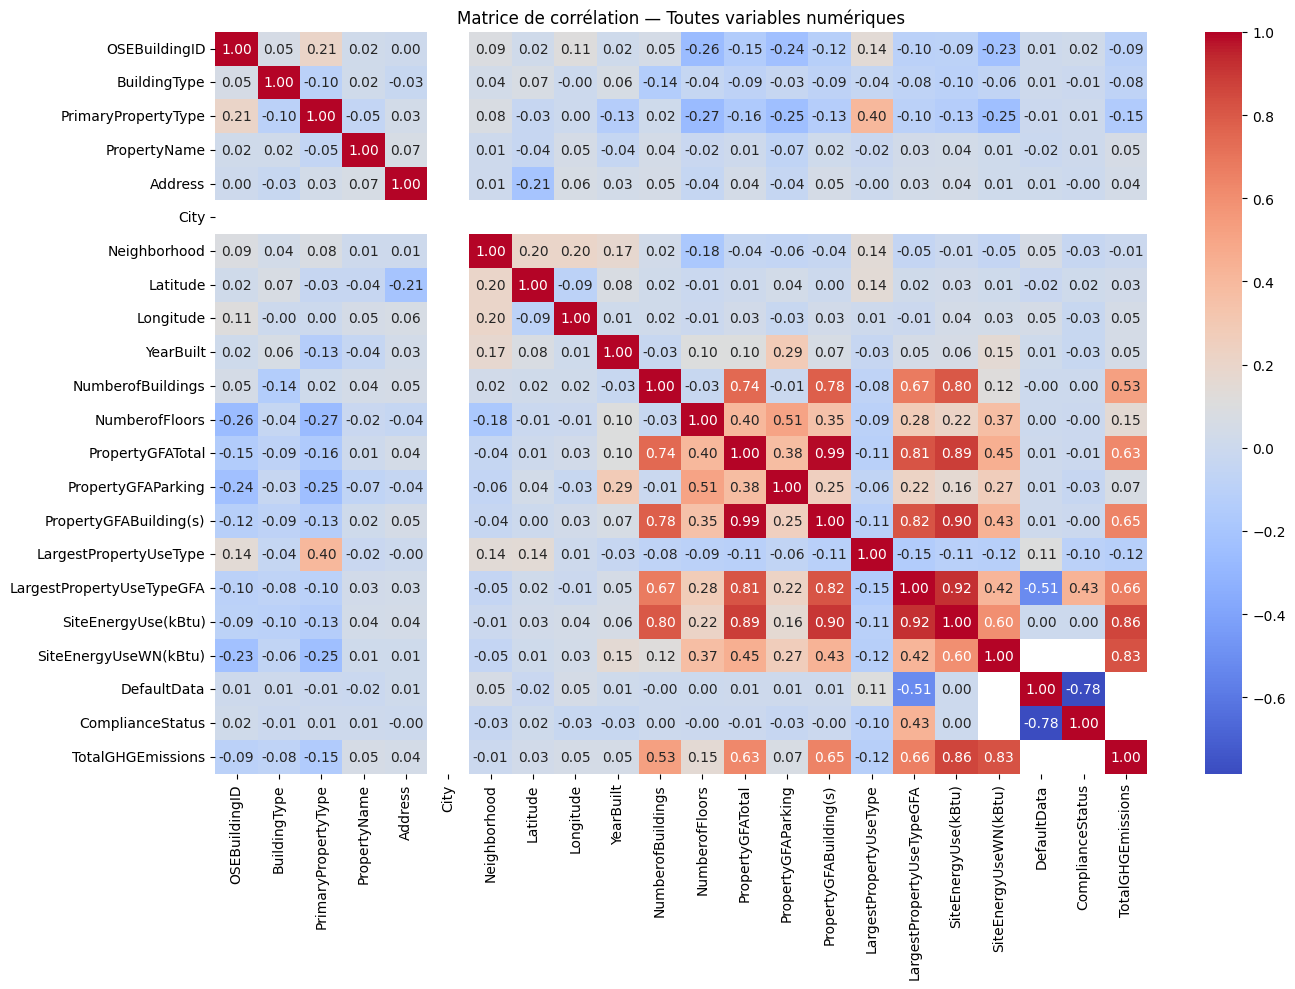


🔍 Paires fortement corrélées (≥ 0.80) :
                          Var1                       Var2  Correlation
150          NumberofBuildings        SiteEnergyUse(kBtu)     0.803766
166           PropertyGFATotal     PropertyGFABuilding(s)     0.990643
168           PropertyGFATotal  LargestPropertyUseTypeGFA     0.813389
169           PropertyGFATotal        SiteEnergyUse(kBtu)     0.886684
183     PropertyGFABuilding(s)  LargestPropertyUseTypeGFA     0.818248
184     PropertyGFABuilding(s)        SiteEnergyUse(kBtu)     0.904516
195  LargestPropertyUseTypeGFA        SiteEnergyUse(kBtu)     0.916948
203        SiteEnergyUse(kBtu)          TotalGHGEmissions     0.861393
204      SiteEnergyUseWN(kBtu)          TotalGHGEmissions     0.825329

⚠️ Corrélation forte : NumberofBuildings ↔ SiteEnergyUse(kBtu) (corr = 0.80)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  1


🗑️ Colonne supprimée : NumberofBuildings

⚠️ Corrélation forte : PropertyGFATotal ↔ PropertyGFABuilding(s) (corr = 0.99)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  1


🗑️ Colonne supprimée : PropertyGFATotal

⚠️ Corrélation forte : PropertyGFATotal ↔ LargestPropertyUseTypeGFA (corr = 0.81)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  1


🗑️ Colonne supprimée : PropertyGFATotal

⚠️ Corrélation forte : PropertyGFATotal ↔ SiteEnergyUse(kBtu) (corr = 0.89)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  1


🗑️ Colonne supprimée : PropertyGFATotal

⚠️ Corrélation forte : PropertyGFABuilding(s) ↔ LargestPropertyUseTypeGFA (corr = 0.82)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  0


✔️ Aucune suppression pour cette paire.

⚠️ Corrélation forte : PropertyGFABuilding(s) ↔ SiteEnergyUse(kBtu) (corr = 0.90)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  0


✔️ Aucune suppression pour cette paire.

⚠️ Corrélation forte : LargestPropertyUseTypeGFA ↔ SiteEnergyUse(kBtu) (corr = 0.92)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  0


✔️ Aucune suppression pour cette paire.

⚠️ Corrélation forte : SiteEnergyUse(kBtu) ↔ TotalGHGEmissions (corr = 0.86)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  2


🗑️ Colonne supprimée : TotalGHGEmissions

⚠️ Corrélation forte : SiteEnergyUseWN(kBtu) ↔ TotalGHGEmissions (corr = 0.83)
   1 → supprimer Var1
   2 → supprimer Var2
   0 → ne rien supprimer


Votre choix (0/1/2) :  2


🗑️ Colonne supprimée : TotalGHGEmissions

📌 Colonnes supprimées : ['TotalGHGEmissions', 'NumberofBuildings', 'PropertyGFATotal']

✅ Données nettoyées enregistrées dans : data/cleaned_2016_Building_Energy_Benchmarking_ML.csv


In [98]:

from sklearn.preprocessing import LabelEncoder

# 🔹 Étape 1 : Chargement des fichiers
main_file = "data/2016_Building_Energy_Benchmarking_ML.csv"
outliers_file = "data/top_extreme_intensity_outliers.csv"
backup_file = "data/backup_2016_Building_Energy_Benchmarking_ML.csv"
clean_file = "data/cleaned_2016_Building_Energy_Benchmarking_ML.csv"

df = pd.read_csv(main_file)
df_outliers = pd.read_csv(outliers_file)

# 🔹 Étape 2 : Sauvegarde de sécurité
if not os.path.exists(backup_file):
    df.to_csv(backup_file, index=False)
    print("✔️ Sauvegarde créée :", backup_file)
else:
    print("ℹ️ Sauvegarde déjà existante :", backup_file)

# 🔹 Étape 3 : Suppression des outliers extrêmes
df = df[~df['OSEBuildingID'].isin(df_outliers['OSEBuildingID'])]
print(f"✔️ Outliers supprimés : {df_outliers.shape[0]} lignes")

# 🔹 Étape 4 : Correction des types numériques
# Forçage de certaines colonnes à être numériques
force_numeric = [
    'SiteEnergyUse(kBtu)', 
    'SiteEnergyUseWN(kBtu)', 
    'TotalGHGEmissions',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'YearBuilt'
]

for col in force_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🔹 Étape 5 : Encodage des colonnes catégorielles
df_corr = df.copy()
categorical_cols = df_corr.select_dtypes(include='object').columns
encoder = LabelEncoder()

for col in categorical_cols:
    df_corr[col] = encoder.fit_transform(df_corr[col].astype(str))

# 🔹 Étape 6 : Matrice de corrélation sur toutes les colonnes numériques
corr_matrix = df_corr.corr(numeric_only=True)

# 🔹 Affichage de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Matrice de corrélation — Toutes variables numériques")
plt.tight_layout()
plt.show()

# 🔹 Étape 7 : Détection des corrélations ≥ 0.80
pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
pairs.columns = ['Var1', 'Var2', 'Correlation']
pairs = pairs[pairs['Correlation'] >= 0.80]

print("\n🔍 Paires fortement corrélées (≥ 0.80) :")
print(pairs)

# 🔹 Étape 8 : Suppression interactive variable par variable
cols_to_drop = []

for _, row in pairs.iterrows():
    v1, v2, corr = row['Var1'], row['Var2'], row['Correlation']
    print(f"\n⚠️ Corrélation forte : {v1} ↔ {v2} (corr = {corr:.2f})")
    print("   1 → supprimer Var1")
    print("   2 → supprimer Var2")
    print("   0 → ne rien supprimer")
    choice = input("Votre choix (0/1/2) : ")

    if choice == "1":
        cols_to_drop.append(v1)
        print(f"🗑️ Colonne supprimée : {v1}")
    elif choice == "2":
        cols_to_drop.append(v2)
        print(f"🗑️ Colonne supprimée : {v2}")
    else:
        print("✔️ Aucune suppression pour cette paire.")

# 🔹 Étape 9 : Application des suppressions
cols_to_drop = list(set(cols_to_drop))
print("\n📌 Colonnes supprimées :", cols_to_drop)
df_cleaned = df.drop(columns=cols_to_drop)

# 🔹 Étape 10 : Sauvegarde finale
df_cleaned.to_csv(clean_file, index=False)
print(f"\n✅ Données nettoyées enregistrées dans : {clean_file}")


In [99]:
# 1. Chargement des données et aperçu général 
building_consumption = pd.read_csv("data/cleaned_2016_Building_Energy_Benchmarking_ML.csv")
# Aperçu général
print("Dimensions :", building_consumption.shape)
print("\nColonnes :", building_consumption.columns.tolist())
building_consumption.head()

# 2. Informations générales sur les colonnes
# Infos sur les types de données et valeurs non nulles
building_consumption.info()



Dimensions : (1504, 19)

Colonnes : ['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'DefaultData', 'ComplianceStatus']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              1504 non-null   int64  
 1   BuildingType               1504 non-null   object 
 2   PrimaryPropertyType        1504 non-null   object 
 3   PropertyName               1504 non-null   object 
 4   Address                    1504 non-null   object 
 5   City                       1504 non-null   object 
 6   Neighborhood               1504 non-null   object 
 7 